In [1]:
!pip install numpy gensim sklearn keras tensorflow pandas matplotlib

In [2]:
import collections, numpy
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from numpy.random import seed
from tensorflow import set_random_seed
import keras.backend as backend
import matplotlib.pyplot as plt
import pandas as pd


Using TensorFlow backend.


In [3]:
#Rohdaten
sentencesRaw = """hated the movie it was stupid;\ni hated it so boring;\nawesome the movie was inspiring;\nhated it what a disaster;\nwe hated the movie they were idiotic;\nhe was stupid, hated her;\nstupid movie is boring;\ninspiring ourselves, awesome;\ninspiring me, brilliant;\nwe hated it they were rubbish;\nany inspiring movie is amazing;\nit was stupid what a disaster;\nits stupid, rubbish;\nstupid, idiotic!;\nawesome great movie;\nboring, must be hated;\nhe was boring the movie was stupid;\nboring movie was a disaster;\nboth boring and rubbish;\nso boring and idiotic;\ngreat to amazing;\ndisaster, more than hated;\nbetween disaster and stupid;\ndisaster, so boring;\nawesome movie, brilliant;\ntoo awesome she was amazing;\nhe was brilliant loved it;\ndisaster, only idiotic;\nrubbish movie hated him;\nit was rubbish, why so stupid?;\nrubbish, too boring;\nrubbish, disaster!;\nrubbish, very idiotic;\nidiotic movie hated it;\nshe was idiotic, so stupid;\nidiotic movie, it was boring;\nit was idiotic, movie was a disaster;\nidiotic and rubbish;\nI loved it, it was awesome;\nhe was stupid, hated her;\nbrilliant, loved it;\nloved the movie amazing;\nit was great loved the movie;\nmovie was great, inspiring;\ngreat movie, awesome;\nthey were great, brilliant;\ngreat amazing!;\nThey were inspiring loved it;\ninspiring movie great;\nawesome loved it;\nthey were brilliant great movie;\nshe was brilliant the movie was inspiring;\nhe was brilliant between them they were awesome;\nbrilliant, above amazing;\njust amazing loved it;\ndisaster, o what rubbish;\nabove amazing beyond inspiring;\nso amazing movie was awesome;\namazing brilliant movie;"""
neg_sent="""hated the movie it was stupid;\ni hated it so boring;\nhated it what a disaster;\nwe hated it they were rubbish;\nwe hated the movie they were idiotic;\nhe was stupid, hated her;\nstupid movie is boring;\nit was stupid what a disaster;\nits stupid, rubbish;\nstupid, idiotic!;""".replace(';', '').replace('!', '').replace('?', '').replace(',', '').lower().split('\n')
pos_sent="""I loved it, it was awesome;\nbrilliant, loved it;\nloved the movie amazing;\nit was great loved the movie;\nmovie was great, inspiring;\ngreat movie, awesome;\nthey were great, brilliant;\ngreat amazing!;\nThey were inspiring loved it;\ninspiring movie great;""".replace(';', '').replace('!', '').replace('?', '').replace(',', '').lower().split('\n')
stoplist = set(['it', 'movie', 'the', 'was', 'were', 'so', 'a', 'i', 'he', 'her', 'me', 'any', 'its', 'be', 'they', 'and', 'what', 'she', 'we', 'is'])

# Konstanten
embedding_size = 2

# Datenaufbereitung
texts = [[word for word in sentence.replace(';', '').replace('!', '').replace('?', '').replace(',', '').lower().split() if word not in stoplist] for sentence in sentencesRaw.split('\n')]
print(texts)
print(len(texts))

[['hated', 'stupid'], ['hated', 'boring'], ['awesome', 'inspiring'], ['hated', 'disaster'], ['hated', 'idiotic'], ['stupid', 'hated'], ['stupid', 'boring'], ['inspiring', 'ourselves', 'awesome'], ['inspiring', 'brilliant'], ['hated', 'rubbish'], ['inspiring', 'amazing'], ['stupid', 'disaster'], ['stupid', 'rubbish'], ['stupid', 'idiotic'], ['awesome', 'great'], ['boring', 'must', 'hated'], ['boring', 'stupid'], ['boring', 'disaster'], ['both', 'boring', 'rubbish'], ['boring', 'idiotic'], ['great', 'to', 'amazing'], ['disaster', 'more', 'than', 'hated'], ['between', 'disaster', 'stupid'], ['disaster', 'boring'], ['awesome', 'brilliant'], ['too', 'awesome', 'amazing'], ['brilliant', 'loved'], ['disaster', 'only', 'idiotic'], ['rubbish', 'hated', 'him'], ['rubbish', 'why', 'stupid'], ['rubbish', 'too', 'boring'], ['rubbish', 'disaster'], ['rubbish', 'very', 'idiotic'], ['idiotic', 'hated'], ['idiotic', 'stupid'], ['idiotic', 'boring'], ['idiotic', 'disaster'], ['idiotic', 'rubbish'], ['lo

In [4]:
# Embeddening mit Word2Vec

def hash(astring):
   return 42
model = Word2Vec(texts, size=embedding_size, window=15, min_count=2, iter=1000, sg=1, alpha=0.5, seed=42, hashfxn=hash)
print(model)
wv = model.wv
for key in wv.vocab:
    print(key + "\t"+ str(wv[key]))
    
x_filteredText = [] 
y_sent = numpy.zeros((len(pos_sent + neg_sent), 2), dtype=numpy.int)
for i, sent in enumerate(pos_sent):
  x_filteredText.append([word for word in sent.replace(';', '').replace('!', '').replace('?', '').replace(',', '').split() if word in wv.vocab])
  y_sent[i, 0] = 1
    
for i, sent in enumerate(neg_sent):
  x_filteredText.append([word for word in sent.replace(';', '').replace('!', '').replace('?', '').replace(',', '').split() if word in wv.vocab])
  y_sent[len(pos_sent) + i, 1] = 1
    
x_filteredText = numpy.array(x_filteredText)

print("\nFiltered sentences only keywords "+ str(len(x_filteredText)))
print(numpy.hstack((x_filteredText,y_sent)))

print("y_sentence " + str(y_sent.shape))
print("x_filteredText " + str(x_filteredText.shape))

    
x_train_sent, x_test_sent, y_train, y_test = train_test_split(x_filteredText, y_sent, test_size=0.90, random_state=42)


Word2Vec(vocab=15, size=2, alpha=0.5)
hated	[-1.511874    0.65311617]
stupid	[-1.5818242   0.73847413]
boring	[-1.7194409   0.70466244]
awesome	[0.50847024 1.3642358 ]
inspiring	[0.69274193 1.5083054 ]
disaster	[-1.6835691  0.874036 ]
idiotic	[-2.0795312  0.7973763]
brilliant	[0.60046077 1.4600732 ]
rubbish	[-1.5504162  0.7745622]
amazing	[0.56830156 1.5458757 ]
great	[0.8260495 1.6401058]
between	[-0.24835424  0.70818406]
too	[-0.26764432  0.6407608 ]
loved	[0.63527894 1.4176524 ]
above	[1.2401593 2.2547536]

Filtered sentences only keywords 20
[['loved' 'awesome' '1' '0']
 ['brilliant' 'loved' '1' '0']
 ['loved' 'amazing' '1' '0']
 ['great' 'loved' '1' '0']
 ['great' 'inspiring' '1' '0']
 ['great' 'awesome' '1' '0']
 ['great' 'brilliant' '1' '0']
 ['great' 'amazing' '1' '0']
 ['inspiring' 'loved' '1' '0']
 ['inspiring' 'great' '1' '0']
 ['hated' 'stupid' '0' '1']
 ['hated' 'boring' '0' '1']
 ['hated' 'disaster' '0' '1']
 ['hated' 'rubbish' '0' '1']
 ['hated' 'idiotic' '0' '1']
 ['stu

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


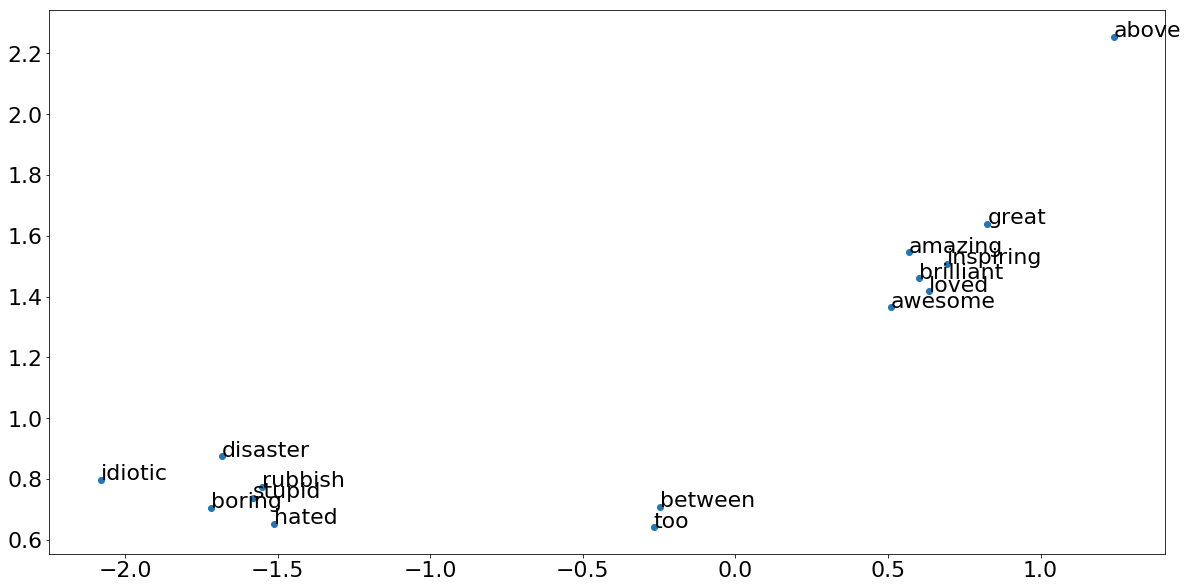

In [5]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)

vocab = list(model.wv.vocab)
X = model[vocab]

df = pd.DataFrame(X, vocab, ['x', 'y'])
for word, pos in df.iterrows(): 
    plt.annotate(word, pos)

ax.scatter(df['x'], df['y'])

In [6]:
print(x_test_sent[0])
print()

x_train = numpy.array([numpy.mean([wv[word] for word in sent if word in wv.vocab], axis=0) for sent in x_train_sent])
x_test = numpy.array([numpy.mean([wv[word] for word in sent if word in wv.vocab], axis=0)for sent in x_test_sent])

#x_train = numpy.array([[wv[word] for word in [sent[0]] if word in wv.vocab] for sent in x_train_sent]).reshape(len(x_train_sent),4)
#x_test = numpy.array([[wv[word] for word in [sent[0]] if word in wv.vocab] for sent in x_test_sent]).reshape(len(x_test_sent),4)

print("x_train " + str(x_train.shape))
print("x_test " + str(x_test.shape))
print(y_train)
print(x_train)
#print(x_train)

['loved' 'awesome']

x_train (2, 2)
x_test (18, 2)
[[0 1]
 [1 0]]
[[-1.7957026   0.7252462 ]
 [ 0.71325517  1.5500896 ]]


In [7]:
# Make training repeatable
seed(15)
set_random_seed(32)

# Train and validate model
backend.clear_session()
model = Sequential([
    Dense(60, input_shape=(embedding_size,)),
    Activation('relu'),
    Dense(2),
    Activation('softmax'),
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#print(model.summary())
model.fit(x_train, y_train, epochs=20, batch_size=2, validation_data=(x_test, y_test))

Train on 2 samples, validate on 18 samples
Epoch 1/20
2/2 [==============================] - 0s 173ms/step - loss: 0.5561 - acc: 1.0000 - val_loss: 0.5493 - val_acc: 1.0000
Epoch 2/20
2/2 [==============================] - 0s 3ms/step - loss: 0.5432 - acc: 1.0000 - val_loss: 0.5374 - val_acc: 1.0000
Epoch 3/20
2/2 [==============================] - 0s 23ms/step - loss: 0.5306 - acc: 1.0000 - val_loss: 0.5257 - val_acc: 1.0000
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 0.5182 - acc: 1.0000 - val_loss: 0.5142 - val_acc: 1.0000
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 0.5060 - acc: 1.0000 - val_loss: 0.5029 - val_acc: 1.0000
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 0.4940 - acc: 1.0000 - val_loss: 0.4919 - val_acc: 1.0000
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 0.4824 - acc: 1.0000 - val_loss: 0.4810 - val_acc: 1.0000
Epoch 8/20
2/2 [==============================] - 0s 4ms/s

In [8]:
# Train without Word2Vec (using one-hot-embedding)
x_train2 = numpy.zeros(shape=(len(x_train_sent), len(wv.vocab)), dtype='float32')
for i, text in enumerate(x_train_sent):
    for word in text:
        if word in wv.vocab:
            j = wv.vocab[word].index
            x_train2[i, j] = 1.0
            
x_test2 = numpy.zeros(shape=(len(x_test_sent), len(wv.vocab)), dtype='float32')
for i, text in enumerate(x_test_sent):
    for word in text:
        if word in wv.vocab:
            j = wv.vocab[word].index
            x_test2[i, j] = 1.0
            
print(numpy.hstack((x_train2, y_train)))

# Make training repeatable
seed(15)
set_random_seed(32)

# Train and validate model
backend.clear_session()
model2 = Sequential([
    Dense(60, input_shape=(len(wv.vocab),)),
    Activation('relu'),
    Dense(2),
    Activation('softmax'),
])

print("x_train2 "+ str(x_train2.shape))
print("x_test2 "+ str(x_test2.shape))
print("y_test "+ str(y_test.shape))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#print(model2.summary())
model2.fit(x_train2, y_train, epochs=50, batch_size=2, validation_data=(x_test2, y_test))

[[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]]
x_train2 (2, 15)
x_test2 (18, 15)
y_test (18, 2)
Train on 2 samples, validate on 18 samples
Epoch 1/50
2/2 [==============================] - 0s 151ms/step - loss: 0.8410 - acc: 0.0000e+00 - val_loss: 0.7347 - val_acc: 0.2778
Epoch 2/50
2/2 [==============================] - 0s 3ms/step - loss: 0.8291 - acc: 0.0000e+00 - val_loss: 0.7317 - val_acc: 0.3333
Epoch 3/50
2/2 [==============================] - 0s 15ms/step - loss: 0.8173 - acc: 0.0000e+00 - val_loss: 0.7286 - val_acc: 0.3333
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 0.8056 - acc: 0.0000e+00 - val_loss: 0.7256 - val_acc: 0.3333
Epoch 5/50
2/2 [==============================] - 0s 5ms/step - loss: 0.7940 - acc: 0.0000e+00 - val_loss: 0.7226 - val_acc: 0.3333
Epoch 6/50
2/2 [==============================] - 0s 3ms/step - loss: 0.7827 - acc: 0.0000e+00 - val_loss: 0.7197 - val_acc: 0.3333
Epoc